<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/TP_Final_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

Baje la siguiente base de datos:
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

Se trata de una base con características de distintos vinos. La idea es predecir su "calidad" de acuerdo a características observables.

In [2]:
import pandas as pd
import numpy as np

from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 25.8MB/s]


# Preguntas

1) Extraiga la base, genere algunos reportes para entendimiento de la misma. Algunos ejemplos:

- Tamaño de la base
- Tipo de variables
- Distribución o correlación entre variables
- Etc...

In [3]:
!unzip red-wine-quality-cortez-et-al-2009.zip
df = pd.read_csv('winequality-red.csv')

df.info()

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#genero una matrix de correlacion entre las variables
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
#Identifico las variables con mayor correlacion
corr_matrix = df.corr() # se calcula la matriz de correlacion
corr_matrix[corr_matrix == 1] = 0 # se elimina la diagonal con resultados =1
corr_matrix.abs().max().sort_values(ascending=False) # se identifica la variable con mayor valor


,0
fixed acidity,0.682978
pH,0.682978
citric acid,0.671703
density,0.668047
free sulfur dioxide,0.667666
total sulfur dioxide,0.667666
volatile acidity,0.552496
alcohol,0.496180
quality,0.476166
chlorides,0.371260


2) Genere una partición train-test (80-20). Tenga en cuenta separar la variable target: 'quality'.

**Respuesta 2:**La variable quality se elimina del DataFrame df y se asigna a una nueva variable X porque es la variable objetivo o dependiente en este análisis.

En el aprendizaje automático, el objetivo es predecir un valor o resultado basándose en un conjunto de características o variables de entrada. En este caso, se intenta predecir la calidad del vino (quality) basándose en otras características del vino como la acidez, el pH, el alcohol, etc.

Por lo tanto, quality es la variable que se quiere predecir, y las demás variables en df son las que se utilizarán para hacer la predicción. Al eliminar quality de df y asignar el resto de las variables a X, se está creando un conjunto de datos de entrada que se puede utilizar para entrenar un modelo de aprendizaje automático para predecir quality.

Este proceso de separar la variable objetivo del resto de las variables es un paso común en el aprendizaje automático, y es necesario para entrenar y evaluar correctamente un modelo

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Add this import statement

#Se separa la variable quality
y = df['quality']
#Se elimina la variable quality del DataFrame df y se asigna a X

X = df.drop('quality', axis=1)


#Se genera la particion train.test ( 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Se entrena al modelo
reg = LinearRegression().fit(X_train, y_train)

# Se calcula  el R2 para los conjuntos de entrenamiento y prueba
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))




0.3655849921479044
0.32664027269868157


3) Genere una Regresión Lineal para identificar la calidad del vino que esté claramente overfiteada. Tal vez para esto tenga que generar variables sintéticas. ¿Cómo sabe qué está overfiteada? ¿Cuál es el score de entrenamiento? ¿Cuál es el problema de ese score?

**Respuesta 3:**Se comprueba que esta overfiteada porque el score de train (0.365) es mayor que el score de test (0.3266).Cuando un score de train es mas alto que el de test esto determina que el modelo esta sobreajustado o overfiteado, indica que el modelo ha aprendido los datos de entrenamiento demasiado bien.Debido a esto el modelo no esta teniendo en cuenta el resto de los datos del data set se enfoca en los datos de entrenamiento y por lo tanto pierde fuerza de prediccion.

4) Busque mejorar el modelo. Regularice como mejor le parezca.

**Respuesta 4**: Se utiliza el metodo Lasso(Least Absolute Shrinkage and Selection Operator)."Operador de seleccion y contraccion mínima absoluta".Los rsultados muestran una fuerte mejora en los scores:0.365 y 0.326 tanto para train como para test respectivamente. Lasso es un modelo lineal que se utiliza para la regresión y la seleccion de caracteristicas.Basicamente se utiliza para a) Predecir Valores: Predice la variable dependiente a partir de un conjunto de variables predictoras(independientes).b)Seleccionar ** (*) caracteristicas** importantes: Identifica las variables más importantes y a las demas le reduce el coeficiente a cero.Esto ayuda a mejorar la precision de la prediccion.En el contexto de Machine Learning, las características son las variables independientes que se utilizan para predecir la variable dependiente o variable objetivo.

Ejemplo: si quisieramos  predecir el precio de una casa. Algunas características que se  podrían utilizar  son:

Tamaño de la casa (metros cuadrados)
Número de habitaciones
Número de baños
Ubicación (código postal)
Edad de la casa (años)
Cada una de estas variables proporciona información que podría ser relevante para predecir el precio de la casa.

(*)Las características se pueden representar de diferentes maneras:

Numéricas: Valores numéricos continuos o discretos (ej. tamaño de la casa, edad de la casa).
Categóricas: Valores que representan categorías o grupos (ej. ubicación, tipo de casa).
Binarias: Valores que representan la presencia o ausencia de una característica (ej. tiene garaje (sí/no), tiene piscina (sí/no)).

La selección de características es un paso crucial en Machine Learning:

Mejora la precisión del modelo: Al utilizar solo las características más relevantes, se puede reducir el ruido y mejorar la capacidad del modelo para generalizar a nuevos datos.
Reduce la complejidad del modelo: Un modelo con menos características es más fácil de interpretar y entender.
Reduce el tiempo de entrenamiento: Entrenar un modelo con menos características es más rápido.

Lasso y la selección de características:

Lasso es una técnica que se utiliza para la selección de características. Al aplicar una penalización L1 a los coeficientes del modelo, Lasso fuerza a que algunos coeficientes se reduzcan a cero. Las características correspondientes a los coeficientes que se vuelven cero se eliminan del modelo.

En resumen, las características son las variables independientes que se utilizan para predecir la variable objetivo en Machine Learning. La selección de características es un paso importante para mejorar la precisión y la interpretabilidad del modelo. Lasso es una técnica que se puede utilizar para la selección de características.Qué significa " que las caracteristicas correspondientes a los coeficientes que se vuelven cero se eliminan del modelo?
:
Ejemplo : si tenemos la siguiente ecuación simple de regresión lineal:

y = b0 + b1*x1 + b2*x2

Donde:

y es la variable dependiente (lo que queremos predecir).
x1 y x2 son las características (variables independientes).
b0, b1 y b2 son los coeficientes del modelo (**representan el peso o la importancia de cada característica**).
Lasso añade una penalización a esta ecuación que "castiga" los valores absolutos de los coeficientes. Al minimizar la función de coste con esta penalización, Lasso intenta hacer que los coeficientes sean lo más pequeños posible. En algunos casos, esto lleva a que algunos coeficientes se vuelvan exactamente cero.

¿Qué significa que un coeficiente sea cero?

Si b1 se convierte en cero, la ecuación se convierte en:

y = b0 + 0*x1 + b2*x2

y = b0 + b2*x2

Observamos que  x1 ha desaparecido de la ecuación. Esto significa que x1 ya no se utiliza para predecir y. En otras palabras, Lasso ha determinado que la característica x1 no es relevante para el modelo y la ha eliminado.

In [9]:
#Se regulariza utilizando un modelo Lasso:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lr = LogisticRegression(penalty='l1', max_iter=1000, solver='liblinear')
lr.fit(X_train,y_train)

#Score de train y  de test
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.5856137607505864
0.590625


5) Investigue algún otro modelo de regresión y aplíquelo. No importa que no entienda tanto su funcionamiento, verá que en Sklearn todos los modelos tienen una estructura de implementación similar. Debería poder mejorar el score de testeo obtenido con regresión lineal. Recuerde primero overfitear el modelo (para eso tal vez tenga que generar variables nuevas) y luego regularizarlo (eso lo puede hacer no incluyendo todas las variables, reduciendo la dimensionalidad o ajustando hiperparámetros). Otros modelos overfitean mucho más fácil que la regresión lineal. Esta última pregunta excede un poco lo visto en clase, pero tiene el objetivo de animarlos a la propia investigación.

Ejemplos posibles:
- Árbol de decisión
- Random Forest
- Extra Trees
- SVM

**Desarrollo del modelo de Arbol de Decisión**

Score de train 0.46888580470080277
Score de test 0.3366399264084673
Score de train 0.72476408909974
Score de test 0.18678253197413586
Error cuadrático medio (MSE): 0.43350969496749786
Error cuadrático medio (MSE): 0.531442380301004


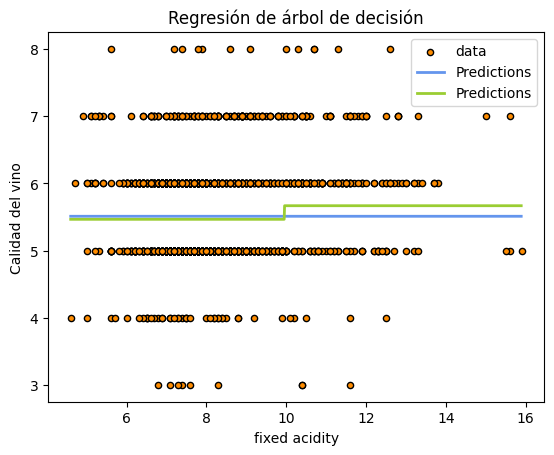

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carga los datos del vino
wine_data = pd.read_csv("winequality-red.csv")

# Separa las características (X) y la variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de árbol de decisión
regressor1 = DecisionTreeRegressor(max_depth=5, random_state=42) # Define la profundidad máxima
regressor2 = DecisionTreeRegressor(max_depth=8, random_state=42) # Define la profundidad máxima
# Entrena el modelo con los datos de entrenamiento
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)
print(f"Score de train",regressor1.score(X_train,y_train))
print(f"Score de test",regressor1.score(X_test,y_test))

print(f"Score de train",regressor2.score(X_train,y_train))
print(f"Score de test",regressor2.score(X_test,y_test))




# Evalúa el rendimiento de los  modelos
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Error cuadrático medio (MSE): {mse1}")
print(f"Error cuadrático medio (MSE): {mse2}")

# Visualiza las predicciones para una característica específica
feature_index = 0  # Selecciona la característica a visualizar
feature_name = X_train.columns[feature_index]

# Crea un rango de valores para la característica seleccionada
X_test_range = np.arange(min(X_train[feature_name].min(), X_test[feature_name].min()),
                          max(X_train[feature_name].max(), X_test[feature_name].max()),
                          0.01)

# Crea un DataFrame para las predicciones
X_test_df = pd.DataFrame(index=range(len(X_test_range)), columns=X_train.columns)
X_test_df[feature_name] = X_test_range
for col in X_train.columns:
  if col != feature_name:
    X_test_df[col] = X_train[col].mean()

# Realiza predicciones en el rango de valores
y_pred_range1 = regressor1.predict(X_test_df)
y_pred_range2 = regressor2.predict(X_test_df)

# Grafica los resultados
plt.figure()
plt.scatter(X_train[feature_name], y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test_range, y_pred_range1, color="cornflowerblue", label="Predictions", linewidth=2)
plt.plot(X_test_range, y_pred_range2, color="yellowgreen", label="Predictions", linewidth=2)
plt.xlabel(feature_name)
plt.ylabel("Calidad del vino")
plt.title("Regresión de árbol de decisión")
plt.legend()
plt.show()

**Analisis del Grafico:**El gráfico de regresión de árbol de decisión muestra la relación entre una característica específica del vino y la calidad del vino predicha por el modelo. La línea azul representa las predicciones del primer modelo (con max depth 5) y la línea verde representa las predicciones del segundo modelo (max depth 8).

Interpretación del gráfico:

Relación no lineal: Se puede observar que la relación entre la característica y la calidad del vino no es lineal. El modelo de árbol de decisión puede capturar estas relaciones no lineales al dividir los datos en diferentes regiones y realizar predicciones separadas para cada región.
Complejidad del modelo: La línea verde (modelo con max depth 8) es más compleja y tiene más cambios bruscos que la línea azul (modelo con max depth 5). Esto indica que el segundo modelo es más propenso al overfitting, ya que se ajusta a los datos de entrenamiento con mayor precisión, pero puede no generalizar tan bien a nuevos datos.
Overfitting: Las líneas del modelo se ajustan demasiado a los datos de entrenamiento y tienen muchos cambios bruscos, esto puede ser un signo de overfitting.
Que la relación entre la característica del vino y la calidad predicha sea no lineal significa que no se puede representar con una línea recta.Que la relación sea compleja significa que el modelo ha identificado diferentes patrones y subgrupos dentro de los datos. El modelo ha tenido que dividir los datos en múltiples segmentos y asignar una predicción diferente a cada segmento para capturar la complejidad de la relación.Tambien hay muchos saltos y cambios bruscos,esto infiere que  la relación es más compleja y no lineal. Podría ser que ciertos rangos de fixed acidity se asocian con vinos de mayor calidad, mientras que otros rangos se asocian con vinos de menor calidad.

**Proceso para generalizar los modelos**


In [79]:

from sklearn.model_selection import GridSearchCV

# Define el espacio de hiperparámetros para la búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo número de muestras en una hoja
}

# Crea un modelo de árbol de decisión
regressor = DecisionTreeRegressor(random_state=42)

# Crea un objeto GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2')

# Ajusta el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el rendimiento del modelo con los mejores hiperparámetros
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = best_regressor.score(X_test, y_test)

print("Error cuadrático medio (MSE):", mse)
print("R cuadrado (R2):", r2)

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Error cuadrático medio (MSE): 0.4400229060803486
R cuadrado (R2): 0.32667335760206073


**Investigacion sobre preguna 5:**
Los resultados del modelo de árbol de decisión muestran que el modelo está overfiteado. Esto se debe a que el score de train (0.47) es mayor que el score de test (0.34), lo que indica que el modelo ha aprendido los datos de entrenamiento demasiado bien y no generaliza bien a nuevos datos.Para regularizar el modelo, se puede intentar lo siguiente: Reducir la profundidad máxima del árbol: Un árbol menos profundo será menos complejo y tendrá menos probabilidades de overfitear. SE Puedes ajustar el hiperparámetro max_depth del modelo DecisionTreeRegressor e it probandoa con valores más bajos para max_depth. Otra posiblidad seria aumentar el número mínimo de muestras requeridas para dividir un nodo: Esto puede evitar que el árbol cree ramas basadas en un número muy pequeño de muestras, lo que puede conducir a overfitting. Se puede ajustar los hiperparámetros min_samples_split o min_samples_leaf.
Podar el árbol: La poda consiste en eliminar nodos del árbol que no contribuyen significativamente a la precisión del modelo. Se puedes utilizar técnicas de poda como la poda de complejidad de coste. Utilizar técnicas de ensemble: Las técnicas de ensemble como Random Forest o Extra Trees pueden ayudar a reducir el overfitting al combinar las predicciones de varios árboles de decisión.Que la relación sea compleja significa que el modelo ha identificado diferentes patrones y subgrupos dentro de los datos. El modelo ha tenido que dividir los datos en múltiples segmentos y asignar una predicción diferente a cada segmento para capturar la complejidad de la relación.Tambien hay muchos saltos y cambios bruscos,esto infiere que  la relación es más compleja y no lineal. Podría ser que ciertos rangos de fixed acidity se asocian con vinos de mayor calidad, mientras que otros rangos se asocian con vinos de menor calidad.